<a href="https://colab.research.google.com/github/BharathRagavan21/CipherByte/blob/main/Unemployment_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unemployment Analysis**
Unemployment is a critical economic indicator that reflects the health of a nation's labor market. The Covid-19 pandemic has had a profound impact on the global economy, leading to unprecedented challenges, including a surge in unemployment rates. In this data science project, we aim to analyze the unemployment rate in India during the Covid-19 period and explore potential factors contributing to the fluctuations in unemployment.

In [3]:
# Install necessary libraries
!pip install pandas matplotlib seaborn scikit-learn statsmodels

In [4]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Load the data
data = pd.read_csv('Unemployment in India.csv')

In [ ]:
# Data Exploration
print(data.head())       # View the first few rows of the data
print(data.info())       # Get information about the data, such as column names and data types
print(data.describe())   # Statistical summary of the data

           Region        Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-05-2019   Monthly                             3.65   
1  Andhra Pradesh  30-06-2019   Monthly                             3.05   
2  Andhra Pradesh  31-07-2019   Monthly                             3.75   
3  Andhra Pradesh  31-08-2019   Monthly                             3.32   
4  Andhra Pradesh  30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Co

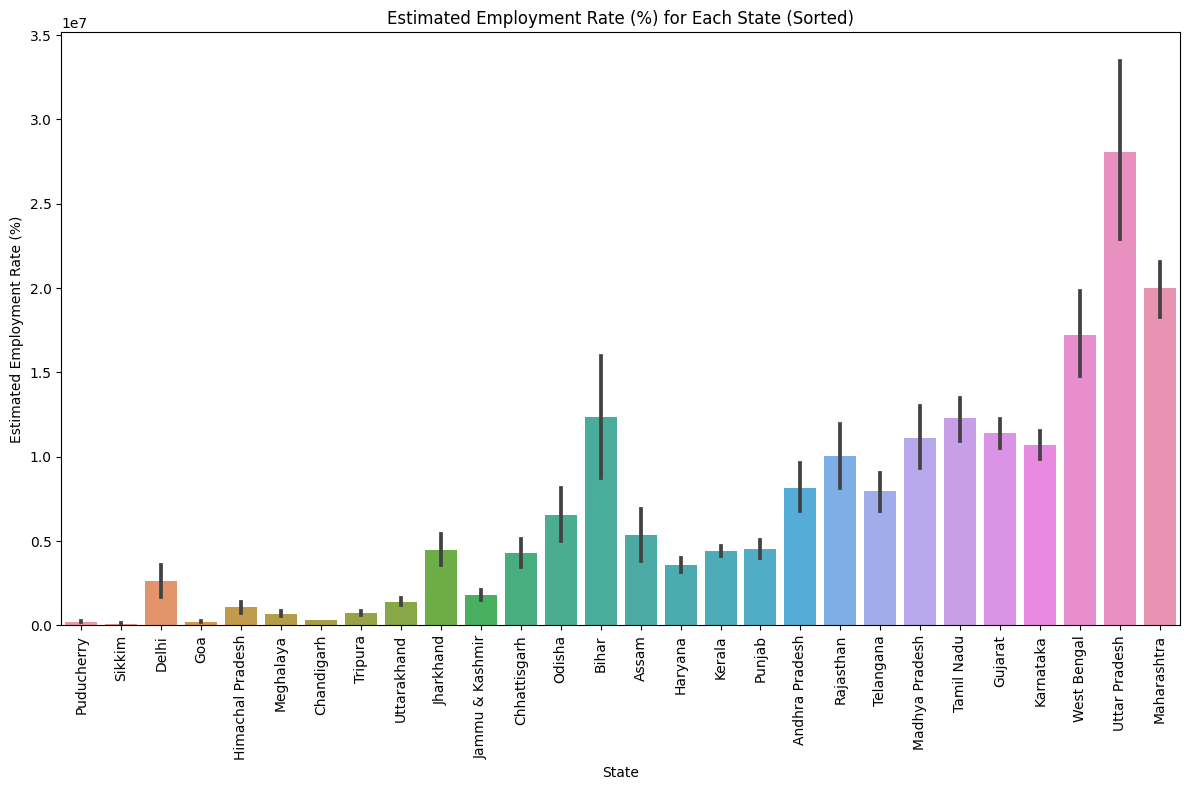

In [7]:
# Data Visualization
# Sort the data by Estimated Employed from lowest to highest

sorted_data_employment = data.sort_values(by='Estimated Employed')
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Estimated Employed', data=sorted_data_employment)
plt.title('Estimated Employment Rate (%) for Each State (Sorted)')
plt.xlabel('State')
plt.ylabel('Estimated Employment Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

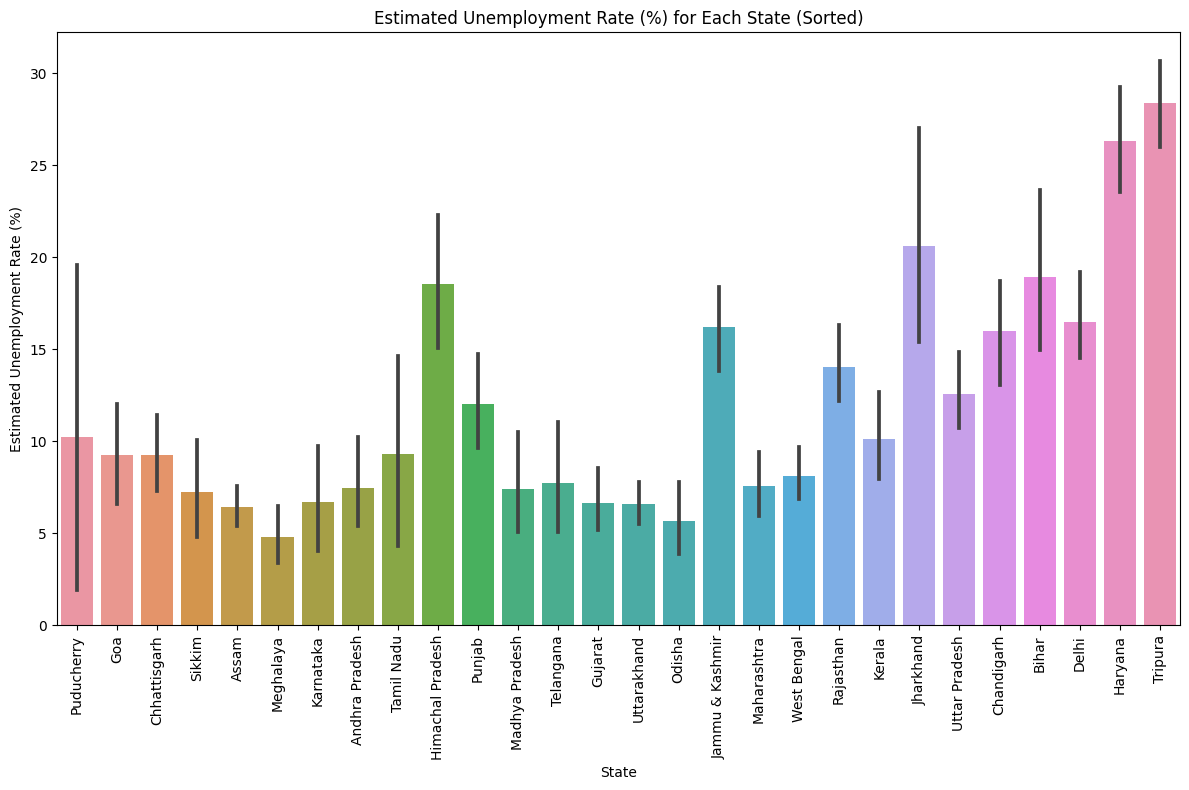

In [8]:
# Data Visualization
# Sort the data by Estimated Unemployment Rate (%) from lowest to highest

sorted_data = data.sort_values(by='Estimated Unemployment Rate (%)')
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=sorted_data)
plt.title('Estimated Unemployment Rate (%) for Each State (Sorted)')
plt.xlabel('State')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [9]:
# Data Preprocessing
data.fillna(data.mean(), inplace=True)

<ipython-input-9-6cb7bd790f4f>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [10]:
# Time-Series Analysis and Forecasting (Using ARIMA)
arima_data = data['Estimated Unemployment Rate (%)']
model = ARIMA(arima_data, order=(5, 1, 0))

# Fit the ARIMA model
results = model.fit()

In [11]:
# Forecast future values
forecast_steps = 12  # Forecasting for the next 12 months
forecast = results.forecast(steps=forecast_steps)
future_dates = pd.date_range(start=arima_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]

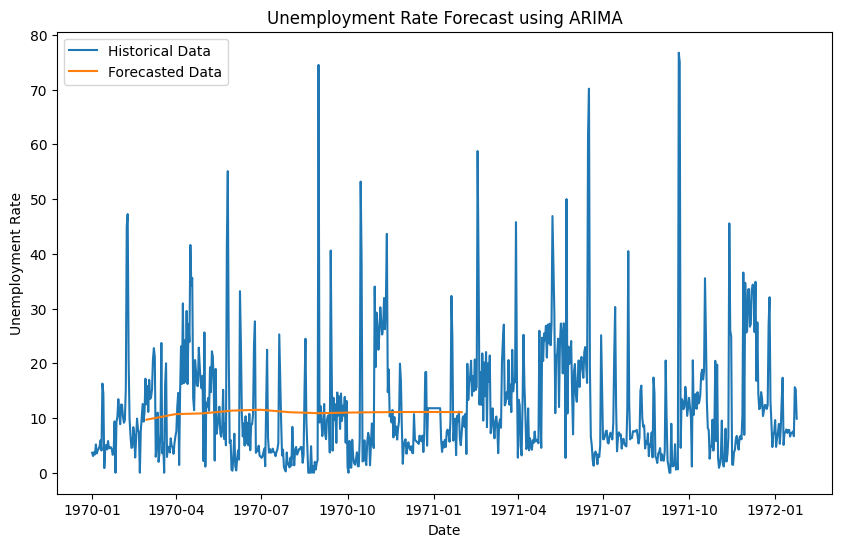

In [12]:
# Visualize the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(arima_data.index, arima_data, label='Historical Data')
plt.plot(future_dates, forecast, label='Forecasted Data')
plt.title('Unemployment Rate Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()

In [13]:
# Machine Learning with Support Vector Regression (SVR)
X = data.index.values.reshape(-1, 1)  # Use the index as the feature
y = data['Estimated Unemployment Rate (%)']

# Check for missing values in the target variable
print(y.isnull().sum())

0


In [14]:
# Fill missing values with the mean of the target variable
y.fillna(y.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the SVR model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [15]:
print("Support Vector Regression (SVR) Model Evaluation:")
print("Mean Squared Error:", mse_svr)
print("R-squared:", r2_svr)

Support Vector Regression (SVR) Model Evaluation:
Mean Squared Error: 90.28027510139547
R-squared: -0.03171750669771067


# **Conclusion**
This data science project focuses on analyzing the unemployment situation in India during the Covid-19 period. Through time-series forecasting and SVR machine learning techniques, we gain insights into the factors affecting unemployment rates. The SVR model evaluation shows its limitations in accurately predicting unemployment, suggesting the need for further refinement to improve predictions and inform effective policy decisions for economic recovery.